In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from pandas import DataFrame


data1 = loadmat('dataset_2.mat')
data2 = data1['samples']
mlabel = data1['labels'][0]
data3 = np.column_stack((data2,mlabel))
df = pd.DataFrame(data3)

In [21]:
df

,0,1,2
0,-3.742040,-3.044657,0.0
1,4.608712,7.017659,3.0
2,5.311356,0.970120,2.0
3,4.881857,5.295445,3.0
4,-4.517404,-1.755663,0.0
...,...,...,...
19995,5.052006,1.276917,2.0
19996,4.035034,6.306404,3.0
19997,5.176663,5.107464,3.0
19998,6.665637,5.465137,3.0


In [22]:
feature_cols = [0,1]
X = df[feature_cols] # Features
feature1 =[2]
y = df[feature1] # Target variable

In [23]:
y

,2
0,0.0
1,3.0
2,2.0
3,3.0
4,0.0
...,...
19995,2.0
19996,3.0
19997,3.0
19998,3.0


In [24]:
def split(df):

# Shuffle your dataset 
    shuffle_df = df.sample(frac=1)

# Define a size for your train set 
    train_size = int(0.7 * len(df))

# Split your dataset 
    train_set = shuffle_df[:train_size]
    test_set = shuffle_df[train_size:]
    
    return train_set,test_set  

In [25]:
train_set, test_set = split(df)


In [26]:
feature_cols = [0,1]
X_train = train_set[feature_cols] # Features
X_test = test_set[feature_cols]

feature1 =[2]
Y_train = train_set[feature1] # Target variable
Y_test = test_set[feature1]

In [27]:
list1=[]
for i in range(15):
    clf = DecisionTreeClassifier(max_depth=i+1)
    clf = clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    yhat=np.array(y_pred)
    y=np.array(Y_test)
    size=yhat.size
    count=0
    for j in range(yhat.size):
        if yhat[j]==y[j]:
            count+=1;
    #print( acc)
    list1.append([i+1,count/yhat.size])
    #list1.append([i+1,metrics.accuracy_score(Y_test, y_pred)])
    #print("Accuracy:",i+1,metrics.accuracy_score(Y_test, y_pred))

In [28]:
list1

[[1, 0.49466666666666664],
 [2, 0.9691666666666666],
 [3, 0.9691666666666666],
 [4, 0.9691666666666666],
 [5, 0.9686666666666667],
 [6, 0.9673333333333334],
 [7, 0.9656666666666667],
 [8, 0.9655],
 [9, 0.9638333333333333],
 [10, 0.9618333333333333],
 [11, 0.9605],
 [12, 0.9585],
 [13, 0.9591666666666666],
 [14, 0.9588333333333333],
 [15, 0.9573333333333334]]

In [29]:
df2 = DataFrame (list1,columns=['Depth','Test Accuracy'])

In [30]:
df2


,Depth,Test Accuracy
0,1,0.494667
1,2,0.969167
2,3,0.969167
3,4,0.969167
4,5,0.968667
5,6,0.967333
6,7,0.965667
7,8,0.965500
8,9,0.963833
9,10,0.961833


Text(0, 0.5, 'Test Accuracy')

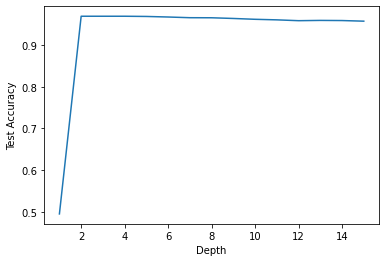

In [31]:
plt.plot(df2['Depth'], df2['Test Accuracy'])
plt.xlabel('Depth')
plt.ylabel('Test Accuracy')